# GW170814

## Installing dependecies

In [1]:
#Installing dependencies
! git clone https://github.com/sum33it/scalpy.git
! cd scalpy
! pip install hope
! python ./scalpy/setup.py install

! pip install triangle
# First installing emcee

!python -m pip install -U pip
!pip install -U setuptools setuptools_scm pep517
!pip install -U emcee
!pip install astroML
!pip install corner


#lIBRARIES:

import emcee
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from astroML.plotting import plot_mcmc
from astroML.resample import bootstrap
from scipy import optimize
import scalpy
from scalpy.scalpy.fluids import *
import emcee
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as pl
import triangle
from matplotlib.ticker import MaxNLocator

import matplotlib.pyplot as plt
import corner





fatal: destination path 'scalpy' already exists and is not an empty directory.
running install
/Users/saba/opt/anaconda3/lib/python3.8/site-packages/setuptools/command/install.py:34: SetuptoolsDeprecationWarning: setup.py install is deprecated. Use build and pip and other standards-based tools.
  warnings.warn(
/Users/saba/opt/anaconda3/lib/python3.8/site-packages/setuptools/command/easy_install.py:156: EasyInstallDeprecationWarning: easy_install command is deprecated. Use build and pip and other standards-based tools.
  warnings.warn(
/Users/saba/opt/anaconda3/lib/python3.8/site-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning: 4.0.0-unsupported is an invalid version and will not be supported in a future release
  warnings.warn(
running bdist_egg
running egg_info
package init file 'scalpy/__init__.py' not found (or not a regular file)
listing git files failed - pretending there aren't any
writing manifest file 'ScalPy.egg-info/SOURCES.txt'
running install_lib
run

# General API to measure H0 value from GW event and their possible counterparts

### (Based on Chen et al 2018)



Consider we have two kind of observations first from galaxy catalogs and second from gravitational wave estimations.

Now it means that wecan have to estimations of first $d_{GW}$ and second $d_{EM}$. 

Using Bayesian model for a single event with GW and EM data we can write the likelihood like this:

$$p(d_{GW}, d_{EM}| H_0) \ = \ \frac{\int \ p(d_{GW} , d_{EM} ,D_L, \alpha, \delta, z | H_0 ) \ dD_L \ d \alpha \ d \delta \ dz }{\beta(H_0)} \ = \ p(H_0 | d_{GW}, d_{EM}) \ p(H_0) $$

where $\beta(H_0)$ is just the normalization factor.

For the nominator we have:

$$ \int \ p(d_{GW} , d_{EM} ,D_L, \alpha, \delta, z | H_0 ) \ dD_L \ d \alpha \ d \delta \ dz = $$  
$$ \int \ dD_L d\alpha d\delta dz$$
<font color='blue'> $$p(d_{GW} | D_L, \alpha, \delta)$$</font>
<font color='green'> $$\ p(d_{EM} | z, \alpha, \delta)$$</font> 
<font color='purple'>$$p(D_L| z, H_0)$$</font> 
<font color='darkpink'>$$p_0(z, \alpha, \delta |H_0)$$</font>


Now I describe each term separately again:

* <font color='blue'> $p(d_{GW} | D_L, \alpha, \delta)$ </font> : GW likelihood from cosmological parameter estimation


* <font color='green'> $p(d_{EM} | z, \alpha, \delta)$</font>  : EM likelihood, if the event has an electromegnetic counterpart this term will just pick a galaxy from a whole galaxy catalog or number of galaxies, otherwise it's just a constant. I'll talk about this term after introducing the galaxy catalog more later.


*  <font color='purple'>$p(D_L| z, H_0)$</font> $ \ = \ \delta_D(D_L - D_L'(z, H_0)$ 


* <font color='darkpink'>$p_0(z, \alpha, \delta |H_0)$</font> : Prior on redshift and cordiante distribution of the hosts which we get from the galaxy catalogs


## Prior function from galaxy catalog

We're getting prior information from the galaxy catalogs. This way, we assume that we can construct a catalog of all the potential host galaxies of an event. We take our prior this way as the some of gaussian distributions centered at the redshift and position of each galaxy in our candidates catalog.

This implies that if we make a prior from all the galaxies in a catalog for one time then we can use it for all the events all the time.

We define the prior this way:

$$ p_0(z, \alpha, \delta | H_0) = p_{catalog} (z , \alpha, \delta) \ =\  \frac{1}{N_{gal}} \Sigma_i^{N_{gal}} N[mean_{z_i} \sigma_{z_i}](z) \ N[mean_{\alpha_i} \sigma_{\alpha_i}](\alpha) \ N[mean_{\delta_i} \sigma_{\delta_i}](\delta)$$


We assume the localization of the objects are quite good so it means that we practically we assume delta functions at the posititons of each of the galaxies and then we assume a typicall standard deviation on the redshift of $c\sigma_z^i = 200 km/s$ , where $mean_{z_i}$ itself is the peculiar velocity corrected redshift of the galaxy.


# Loading GLADE+ data


In [2]:
import pandas as pd
catalog_data = pd.read_csv("./GLADE+.txt", sep =" ")

catalog_data


/Users/saba/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (2,3,4,5,6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,GLADE-no,PGC-no,GWGC-name,HyperLEDA-name,2MASS-name,WISExSCOS-name,SDSS-DR16Q-name,Object-type-flag,RA,DEC,...,v_err,z_err,d_L,d_L_err,dist_flag,M_star,M_star_err,Merger_rate,Merger_rate_err,Unnamed: 39
0,1,43495.0,NGC4736,NGC4736,12505314+4107125,J125053.14+410712.7,NaN,G,192.721451,41.120152,...,NaN,0.000029,4.392418,NaN,3,NaN,NaN,NaN,NaN,NaN
1,2,41934.0,NGC4548,NGC4548,12352642+1429467,J123526.45+142946.9,NaN,G,188.860123,14.496320,...,0.000732,0.000119,15.876007,3.263033,3,0.55,0.07,4.0,0.8,NaN
2,3,60921.0,NGC6503,NGC6503,17492651+7008396,J174926.45+700840.8,NaN,G,267.360474,70.144341,...,0.000222,0.000029,12.446600,0.987781,3,NaN,NaN,NaN,NaN,NaN
3,4,40950.0,NGC4442,NGC4442,12280389+0948130,J122803.90+094813.3,NaN,G,187.016220,9.803620,...,0.000558,0.000103,11.461371,2.484465,3,0.68,0.09,4.1,0.8,NaN
4,5,41164.0,NGC4469,NGC4469,NaN,J122928.05+084500.8,NaN,G,187.367000,8.749890,...,0.000745,0.000120,15.180920,3.321809,3,0.36,0.05,3.8,0.8,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23181753,23181754,NaN,NaN,NaN,NaN,NaN,235959.78+285717,Q,359.999118,28.954734,...,NaN,0.113916,20403.464630,NaN,1,NaN,NaN,NaN,NaN,NaN
23181754,23181755,NaN,NaN,NaN,NaN,NaN,235959.83+344315,Q,359.999303,34.720842,...,NaN,0.135597,27158.368406,NaN,1,NaN,NaN,NaN,NaN,NaN
23181755,23181756,NaN,NaN,NaN,NaN,NaN,235959.90+031606.9,Q,359.999615,3.268586,...,NaN,0.073688,8792.439985,NaN,1,NaN,NaN,NaN,NaN,NaN
23181756,23181757,NaN,NaN,NaN,NaN,NaN,235959.94+204315.8,Q,359.999759,20.721079,...,NaN,0.099325,16022.500633,NaN,1,NaN,NaN,NaN,NaN,NaN


In [3]:
catalog_data.columns

Index(['GLADE-no', 'PGC-no', 'GWGC-name', 'HyperLEDA-name', '2MASS-name',
       'WISExSCOS-name', 'SDSS-DR16Q-name', 'Object-type-flag', 'RA', 'DEC',
       'B', 'B_err', 'B_flag', 'B_Abs', 'J', 'J_err', 'H', 'H_err', 'K',
       'K_err', 'W1', 'W1_err', 'W2', 'W2_err', 'W1_flag', 'B_J', 'B_J_err',
       'z_helio', 'z_cmb', 'z_flag', 'v_err', 'z_err', 'd_L', 'd_L_err',
       'dist_flag', 'M_star', 'M_star_err', 'Merger_rate', 'Merger_rate_err',
       'Unnamed: 39'],
      dtype='object')

In [4]:
#Cleaning the catalog
catalog_data = catalog_data[["RA", "DEC", "z_cmb"]]
catalog_data = catalog_data[catalog_data.columns[~catalog_data.isnull().all()]]
catalog_data

,RA,DEC,z_cmb
0,192.721451,41.120152,0.001733
1,188.860123,14.496320,0.003573
2,267.360474,70.144341,0.002803
3,187.016220,9.803620,0.002582
4,187.367000,8.749890,0.003417
...,...,...,...
23181753,359.999118,28.954734,2.447875
23181754,359.999303,34.720842,3.103939
23181755,359.999615,3.268586,1.230502
23181756,359.999759,20.721079,2.006303


In [5]:
RA_GLADE = catalog_data["RA"]
DEC_GLADE = catalog_data["DEC"]
z_GLADE = catalog_data["z_cmb"]

nans = np.isnan(z_GLADE)
RA_GLADE = RA_GLADE[~nans]
DEC_GLADE = DEC_GLADE[~nans]
z_GLADE = z_GLADE[~nans]
print(len(z_GLADE))
catalog_data



22635197


,RA,DEC,z_cmb
0,192.721451,41.120152,0.001733
1,188.860123,14.496320,0.003573
2,267.360474,70.144341,0.002803
3,187.016220,9.803620,0.002582
4,187.367000,8.749890,0.003417
...,...,...,...
23181753,359.999118,28.954734,2.447875
23181754,359.999303,34.720842,3.103939
23181755,359.999615,3.268586,1.230502
23181756,359.999759,20.721079,2.006303


# Loading GW parameter estimation result

In [6]:
#Loading the GW PE
import numpy as np
from __future__ import print_function
import os
import matplotlib
%matplotlib inline
from matplotlib import pyplot
import h5py
from IPython.display import Image
from pycbc.inference.io import loadfile


fp = loadfile('./d_L-posteriors/GW190413_134308-PYCBC-POSTERIOR-XPHM.hdf', 'r')
distance_posterior = np.array(fp["samples"]["distance"])
print(list(fp['samples'].keys()))


#We should load the GW posteriors here as our likelihoods
distance_posterior = np.array(fp["samples"]["distance"])
#RA and DEC are in raian I should convert them to degree before movign on
ra_posterior = np.array(fp["samples"]["ra"]) * 180 / np.pi
dec_posterior = np.array(fp["samples"]["dec"]) * 180 / np.pi


PyCBC.libutils: pkg-config call failed, setting NO_PKGCONFIG=1


['chi_eff', 'chi_p', 'coa_phase', 'dec', 'delta_tc', 'distance', 'inclination', 'loglikelihood', 'logwt', 'q', 'ra', 'redshift', 'spin1_a', 'spin1_azimuthal', 'spin1_polar', 'spin2_a', 'spin2_azimuthal', 'spin2_polar', 'srcmass1', 'srcmass2', 'srcmchirp']


# First lets see some simple statistics about this event and its posteriors:

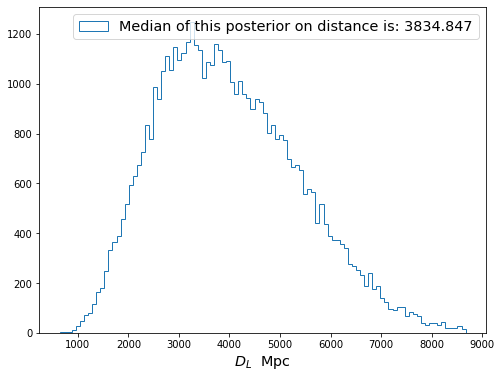

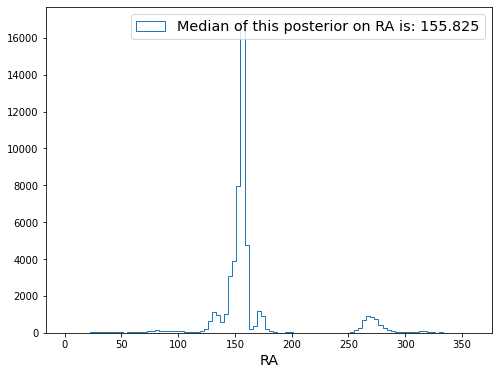

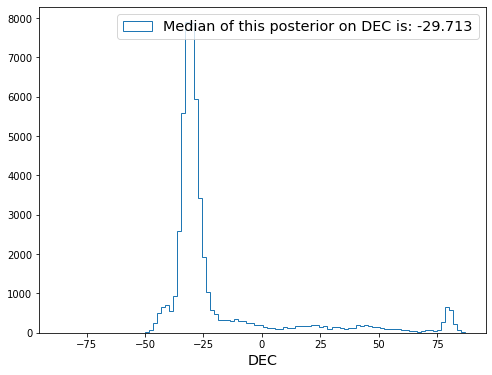

In [7]:
fig, ax = plt.subplots(1 , figsize = (8,6))
median_dist = np.median(distance_posterior)
plt.hist(distance_posterior, bins = 100, histtype = "step", label = "Median of this posterior on distance is: "+ str(np.round(median_dist, 3)))
plt.xlabel("$D_L \ $ Mpc", fontsize = "x-large")
plt.legend(fontsize = "x-large")
plt.show()


fig, ax = plt.subplots(1 , figsize = (8,6))
median_ra = np.median(ra_posterior)
plt.hist(ra_posterior, bins = 100, histtype = "step", label = "Median of this posterior on RA is: "+ str(np.round(median_ra, 3)))
plt.xlabel("RA", fontsize = "x-large")
plt.legend(fontsize = "x-large")
plt.show()


fig, ax = plt.subplots(1 , figsize = (8,6))
median_dec = np.median(dec_posterior)
plt.hist(dec_posterior, bins = 100, histtype = "step", label = "Median of this posterior on DEC is: "+ str(np.round(median_dec, 3)))
plt.xlabel("DEC", fontsize = "x-large")
plt.legend(fontsize = "x-large")
plt.show()

In [8]:
ra_std = np.std(ra_posterior)
ra_median = np.median(ra_posterior)
dec_std = np.std(dec_posterior)
dec_median = np.median(dec_posterior)
print(dec_median)

-29.712917834106072


# Making the functions 

__In the current analysis I'm not yet assuming any weight for galaxies and just treat all of them in a same way. But in the next steps, I will put a weight based on the mass of each galaxy.__

In [9]:
import scipy as sp
from scipy import stats

# post = np.vstack([ra_posterior, dec_posterior])
# KDE_pos_event = sp.stats.gaussian_kde(post)

# #KDE made

# GLADE_weight = KDE_pos_event([RA_GLADE, DEC_GLADE])

# GLADE_weight


## Making the function better!


$$ \int \ p(d_{GW} , d_{EM} ,D_L, \alpha, \delta, z | H_0 ) \ dD_L \ d \alpha \ d \delta \ dz = $$  
$$ \int \ dD_L d\alpha d\delta dz$$
<font color='blue'> $$p(d_{GW} | D_L, \alpha, \delta)$$</font>
<font color='green'> $$\ p(d_{EM} | z, \alpha, \delta)$$</font> 
<font color='purple'>$$p(D_L| z, H_0)$$</font> 
<font color='darkpink'>$$p_0(z, \alpha, \delta |H_0)$$</font>



Electromagnetic term will washed out and for the other terms we have:

$\int dD_L$ <font color='blue'> $p(d_{GW} | D_L, \alpha, \delta)$</font> <font color='purple'>$p(D_L| z, H_0) = $</font> 
$p(d_{GW} | \hat{D}_L(z,H_0), \alpha, \delta)$ = <font color='orange'>$Likelihood(z, H_0,\alpha, \delta)$</font>

on the other hand:

<font color='darkpink'>$p_0(z, \alpha, \delta |H_0)$</font> = $\frac{1}{N_{gal}}\Sigma_i^{N_{gal}} N_{z_i}(z) \ \  \delta_{\alpha_i}^D(\alpha) \ \ \delta_{\delta_i}^D (\delta)$

$\rightarrow$

$\int d\alpha d\delta dz$<font color='darkpink'>$p_0(z, \alpha, \delta |H_0)$</font> <font color='orange'> $Likelihood(z, H_0,\alpha, \delta)$</font> = $\int d\alpha d\delta dz$<font color='darkpink'>$ \frac{1}{N_{gal}}\Sigma_i^{N_{gal}} N_{z_i}(z) \ \  \delta_{\alpha_i}^D(\alpha) \ \ \delta_{\delta_i}^D (\delta)$</font>   <font color='orange'>$\times \ \ \ Likelihood(z, H_0,\alpha, \delta)$</font>

= 

$\int dz \frac{1}{N_{gal}}\Sigma_i^{N_{gal}} N_{z_i}(z) \ \  Likelihood(z, H_0,\alpha_i, \delta_i)$


= 
$$ \ \ \int \ dz \ \  (\frac{1}{N_{gal}}\Sigma_i^{N_{gal}} \ \ [ N_{z_i}(z) \times \  Likelihood(z, H_0,\alpha_i, \delta_i)] \ \ )
$$

### For the sake of simplicity, now I czll the above production my likelihood and define a function to calculate that one. Namely I will have this function:

# $$\text{likelihood_gw} =  \frac{1}{N_{gal}}\Sigma_i^{N_{gal}} \ \ [ N_{z_i}(z) \times \  Likelihood(\hat{D}_L(z, H_0),\alpha_i, \delta_i)] \ \  $$ 


The only left variables will be z and H0 as we marginalized over all the rest.



In [10]:
#Experimenting with KDEs
#Question: Does the product of probabilities on 3 1D KDE is the same as the value of the 3D KDE 
#out of the same data used to make 1D KDEs?

post = np.vstack([distance_posterior, ra_posterior, dec_posterior])

KDE1 = sp.stats.gaussian_kde(distance_posterior)
KDE2 = sp.stats.gaussian_kde(ra_posterior)
KDE3 = sp.stats.gaussian_kde(dec_posterior)

KDE23= sp.stats.gaussian_kde(np.vstack([ra_posterior,dec_posterior]))
KDE_total = sp.stats.gaussian_kde(post)


print(KDE1(50) * KDE2(-20) * KDE3(-100))
print(KDE1(50)*KDE23([-20,-100]))
print(KDE_total([50,-20,-100]))


[1.0394134e-29]
[4.52303322e-36]
[6.45757812e-27]


In [11]:
post = np.vstack([distance_posterior, ra_posterior, dec_posterior])
KDE_gw = sp.stats.gaussian_kde(post)

#mean_z = np.array(z_GLADE)
sigma_z = 200 * 1000 / (3* (10**8))

#Likelihoods
from astropy.cosmology import FlatLambdaCDM

good_pos = (np.abs(RA_GLADE - ra_median) <= 2*ra_std) & (np.abs(DEC_GLADE - dec_median) <= 2*dec_std)
z_galaxies = z_GLADE[good_pos]
ra_galaxies = RA_GLADE[good_pos]
dec_galaxies = DEC_GLADE[good_pos]
        
  
def likelihood_gw(z, H0):
    
    #It will be so slow if we actually sum over all the catalog's galaxies, thus we only sum over those 
    #which are in at least two sigma of the event's GW posterior
    
    #Now we only work with these specific galaxies:
    
    #Calculating Ni(z) for all the i's
    GLADE_prior = stats.norm(z_galaxies, sigma_z)
    prob_values_z = GLADE_prior.pdf(z)
    
    print("Number of galaxies to sum over is :", len(prob_values_z))
    #calculating the likelihood from GW data:
    #Setting up the cosmology for calculating the corresponding luminosity distance
    #First calculating the D_L for specific z and H0 value
    cosmo = FlatLambdaCDM(H0=H0, Om0=0.308)
    d_L = cosmo.luminosity_distance(z)
    d_L = d_L.value #The value is in Mpc
    
    print("Luminosity distance is : ", d_L)
    
    dL_array = np.zeros(len(ra_galaxies)) + d_L
    #now we can calculate the likelihood array for all the different d_L and alphai and deltai values:
    values_galaxies = np.vstack([dL_array, ra_galaxies ,dec_galaxies])
    
    print("Now I'm calculating the KDE")
    
    likelihood = KDE_gw(values_galaxies)
    
    #now we're ready to return the complete likelihood_gw value
    return np.mean(prob_values_z * likelihood)

    
    
# def prior(z, ra, dec):
#     #making the KDE around the galaxy's redahift:
    
    
#     #prob_values = prob_values[good_pos]
#     prob_values = prob_values[~np.isnan(prob_values)]
#     if len(prob_values) == 0: 
#         return 0
#     else:
#         return np.mean(prob_values)


In [14]:
import time
t1 = time.time()
#prior(1,2,3)
t2 = time.time()
likelihood_gw(1,20)
t3 = time.time()
print(t2-t1)
print(t3-t2)

Number of galaxies to sum over is : 7500517
Luminosity distance is :  23018.04281034917
Now I'm calculating the KDE
2.7179718017578125e-05
2778.609566926956


In [126]:
means = np.array([0,1,2])
sigma = 1
array = np.array([])
for i in range(10):
    print(np.sum(gaussian(means, sigma , i)))
    


0.694903971433764
0.8828837294397194
0.6949039714337641
0.30039353944426944
0.05855664515089096
0.0045671653572176285
0.00013532302116246955
1.4928045323045304e-06
6.085022622502739e-09
9.1397737074255e-12


__Now that we have prior and likelihood from the GW data we can move on to calculating the posterior on H0. we don't have any likelihood from electromagnetic counterpart now because we're working with the dark sirens that doesn't have any counterpart actually.__

__For our case actually we will have that :__
$$ p(d_{EM}| z, \alpha, \delta) \propto constant $$




Now the only thing that we should do before moving to the posterior construction we should account for the selection effects and normalization resulted by different factors:

    
    



In [127]:
#constructing the MCMC machinery and posteriors:

#For my first simple analysis I will use some assumptions in order to simplify the normalization factor
#to what is followed:

def normalization_factor(H0):
    return H0**3 

def lnprior(H0):#, z, ra, dec):
    
    #flat prior on H0 value between 20 and 200
	if 20 < H0 < 200:
		return 1 #np.log(prior(z,ra,dec))
	return -np.inf


#In the following I'll enter the normalization factor as a part of the likelihood

def lnlike(z, H0):
	return np.log(likelihood_gw(z, H0) / normalization_factor(H0))

def lnprob(z, H0):
	lp = lnprior(z, H0)
	if not np.isfinite(lp):
		return -np.inf
	return lp + lnlike(z, H0)

def ff(theta):
	z, H0=theta
	return -2.*lnprob(z, H0)

def lnp(theta):
	z, H0=theta
	return lnprob(z, H0)



In [128]:
#Finding maximum likelihood values to put as the first step:
lnprob(70*np.median(distance_posterior) / (3 * (10**5)), 70)#,median_ra,median_dec)

array([-10.72643995])

In [130]:
# Find the maximum likelihood value.
result = opt.minimize(ff, [70*np.median(distance_posterior) / (3 * (10**5)), 70])#,median_ra,median_dec])
result['x']

array([  0.14310987,  70.0131968 ,  46.52054023, -46.18765947])

In [131]:
from pycbc.pool import choose_pool
import warnings; warnings.simplefilter('ignore')
import time

z, H0, ra, dec = result['x']
print("""Maximum likelihood result:
    z = {0} (truth: {1})
    H0 = {2} (truth: {3})
""".format(z, 70*np.median(distance_posterior) / (3 * (10**5)) , H0, 70))#, ra, median_ra, dec, median_dec))


Maximum likelihood result:
    z = 0.14310986692526884 (truth: 0.13841430328141482)
    H0 = 70.01319679649878 (truth: 70)
    ra = 46.520540227281586 (truth: 46.528863137721764)
    dec = -46.18765946976167 (truth: -46.19227987328897)



In [132]:

# Set up the sampler.
#Number of cores to use
pool = choose_pool(4)
pool.size=4
ndim, nwalkers = 2, 200


pos = np.array([result['x'] + 1e-3*np.random.randn(ndim) for i in range(nwalkers)])
#pos = np.vstack([np.linspace(20, 200, nwalkers), np.linspace(0.001, 0.5, nwalkers), np.linspace(-1000, 1000, nwalkers)]).T
print("Positions are: ", pos.shape)
sampler_newpostz_withpool = emcee.EnsembleSampler(nwalkers, ndim, lnp, pool = pool)
#print pos
# Clear and run the production chain.
print("Running MCMC...")
start = time.time()
sampler_newpostz_withpool.run_mcmc(pos, 1000, progress=True)
end = time.time()
print("With pooling done.")
serial_time = end - start
print("Serial took {0:.1f} seconds".format(serial_time))


Positions are:  (200, 4)
Running MCMC...


100%|██████████| 1000/1000 [8:20:05<00:00, 30.01s/it]  

With pooling done.
Serial took 30065.4 seconds


18

<Figure size 432x288 with 0 Axes>

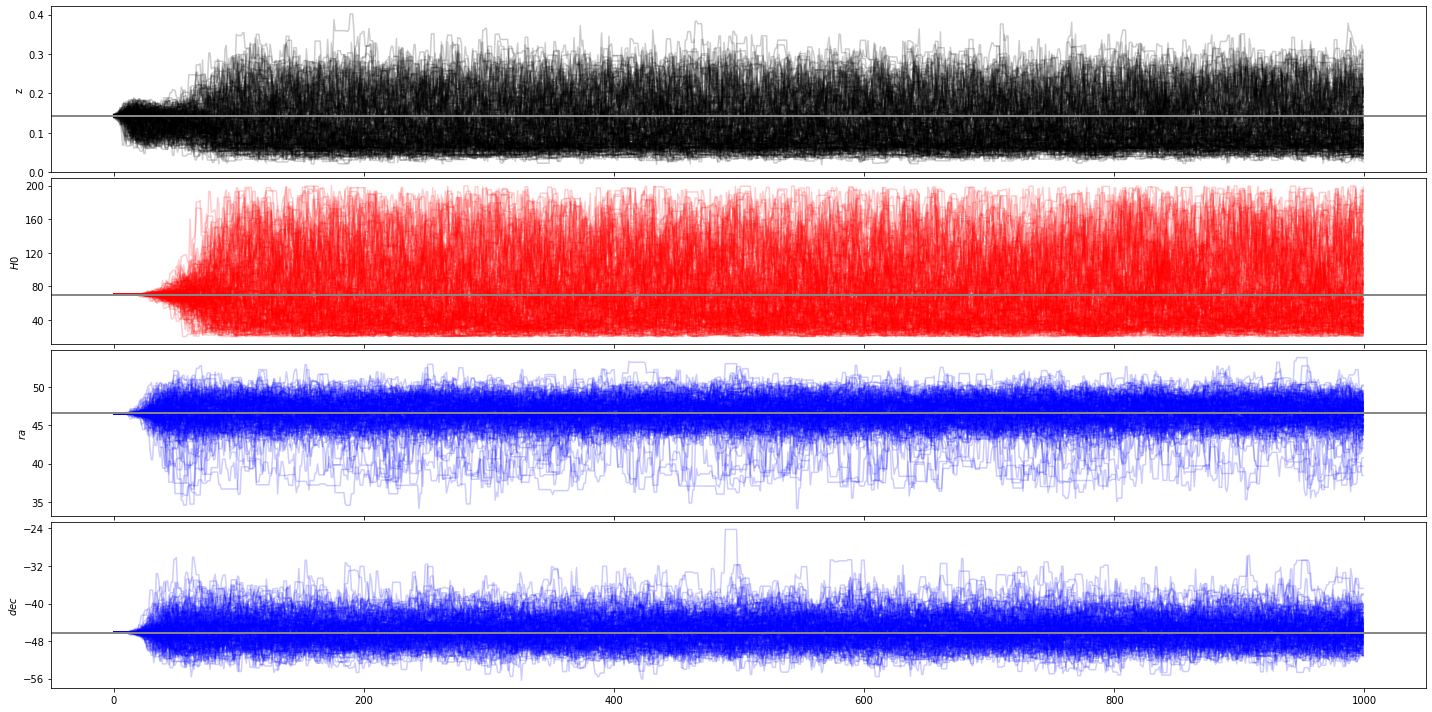

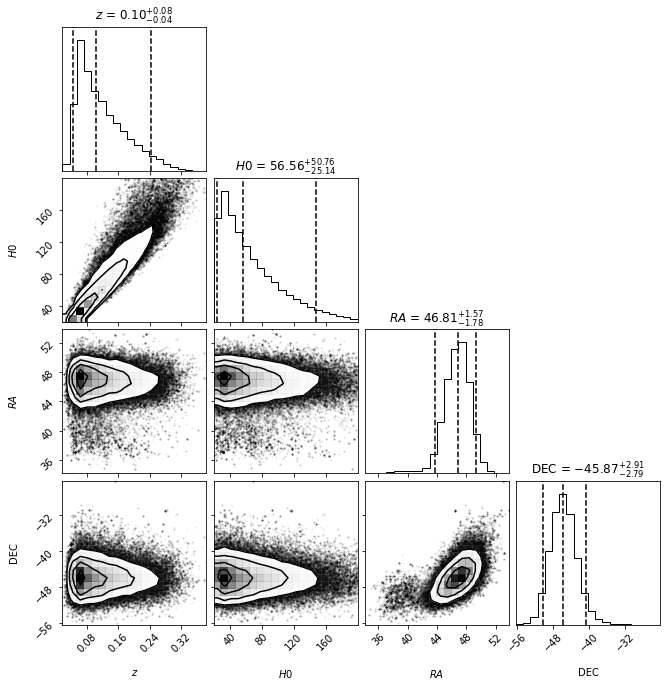

In [139]:

plt.clf()
fig, axes = plt.subplots(4, 1, sharex=True, figsize=(20, 10))
axes[0].plot(sampler_newpostz_withpool.chain[:, :, 0].T, color="k", alpha=0.2)
axes[0].yaxis.set_major_locator(MaxNLocator(5))
axes[0].axhline(z, color="#888888", lw=2)
axes[0].set_ylabel("z")

axes[1].plot(sampler_newpostz_withpool.chain[:, :, 1].T, color="r", alpha=0.2)
axes[1].yaxis.set_major_locator(MaxNLocator(5))
axes[1].axhline(H0, color="#888888", lw=2)
axes[1].set_ylabel("$H0$")


axes[2].plot(sampler_newpostz_withpool.chain[:, :, 2].T, color="b", alpha=0.2)
axes[2].yaxis.set_major_locator(MaxNLocator(5))
axes[2].axhline(ra, color="#888888", lw=2)
axes[2].set_ylabel("$ra$")


axes[3].plot(sampler_newpostz_withpool.chain[:, :, 3].T, color="b", alpha=0.2)
axes[3].yaxis.set_major_locator(MaxNLocator(5))
axes[3].axhline(dec, color="#888888", lw=2)
axes[3].set_ylabel("$dec$")


fig.tight_layout(h_pad=0.0)
fig.savefig("line-time-H0-bbh.png")

# Make the triangle plot.
burnin = 200
samples = sampler_newpostz_withpool.chain[:, burnin:, :].reshape((-1, ndim))



fig = corner.corner(samples, labels=["$z$", "$H0$", "$RA$", "DEC"],quantiles=[0.05, 0.5, 0.95],
                       show_titles=True, title_kwargs={"fontsize": 12})
fig.savefig("H0-bbh.png")

# Writing samples to a file
length=len(samples[:,0])
test = open("H0-bbh.dat","w")
# for i in range(length):
#  	print( i, samples[:,0][i], samples[:,1][i], samples[:,2][i]
#  	test.write('%s' % (samples[:,0][i],)),
#  	test.write('%s' % (" ")),
#  	test.write('%s' % (samples[:,1][i],)),
#  	test.write('%s' % (" ")),
#  	test.write('%s\n' % (samples[:,2][i],))) 
 
# write maximizing results in a file
test1 = open("H0-bbh","w")
test1.write('%s' % (z),)
test1.write('%s' % (" "))
test1.write('%s' % (H0),)
test1.write('%s' % (" "))
test1.write('%s' % (ra),)
test1.write('%s' % (" "))
test1.write('%s' % (dec),)



In [140]:
import pandas as pd

dataframe = pd.DataFrame(samples, columns = ["z", "H0" , "ra", "dec"])
dataframe

,z,H0,ra,dec
0,0.264679,144.546036,47.132468,-44.118321
1,0.264679,144.546036,47.132468,-44.118321
2,0.227241,124.423416,46.489464,-44.484417
3,0.236226,129.550385,46.434588,-44.411349
4,0.236226,129.550385,46.434588,-44.411349
...,...,...,...,...
159995,0.098717,52.718244,46.227756,-40.534956
159996,0.133277,79.286565,46.209016,-43.087366
159997,0.133277,79.286565,46.209016,-43.087366
159998,0.133277,79.286565,46.209016,-43.087366


In [141]:
dataframe.to_csv("./BBH-posteriors-on-z-H0-ra-dec.csv")
print("done")

done


# We can make the above procedure faster by using a smart trick
## We will use the mont-carlo integration aproach and use the exact samples in the likelihhod to measure the expectation value of the $N_{z_i}$ value.

Let's rewrite the function this way: 

for each sample $\{\hat{D}_L(z,H_0), \alpha, \delta\}$ we calculate the following function using the galaxy catalog:
$$ \eta (z, H_0) =  N_{z_i}(z) \ \times \ TopHat_{\alpha_i, \delta_i}(\alpha,\delta) $$

In [ ]:
print(np.tile(dec_catalog, len(distance_posterior)  ))

In [14]:
dec_catalog = np.array(DEC_GLADE)
ra_catalog = np.array(RA_GLADE)
z_catalog = np.array(z_GLADE)
sigma_z = 200 * 1000 / (3* (10**8))

num_gal = len(z_catalog)


#pre-calculating good-pos



In [31]:
import time

#for each sample deci rai zi
def eta(deci,rai,zi):
    print(1)
    good_pos = np.where( np.sqrt( (dec_catalog - deci)**2 + (ra_catalog -rai)**2 ) < 0.01)
    Nzgal = stats.norm(z_catalog[good_pos], sigma_z)
    #print(z_catalog[good_pos])
    nzi = Nzgal.pdf(zi)
    del good_pos
    del Nzgal
    
    return np.sum(nzi) / num_gal

#or another way
from astropy.cosmology import Planck13, Planck18, z_at_value
import astropy.units as u

def prob(H0):
    cosmo = FlatLambdaCDM(H0=H0, Om0=0.308)
    t1 = time.time()
    z_posterior = z_at_value(cosmo.luminosity_distance, distance_posterior * u.Mpc)
    t2 = time.time()
    print("z posterior evaluation time: ", t2-t1)
    z_posterior = z_posterior.value
    
    #let's not work withthe complete sample:
    poses = np.random.choice(distance_posterior.shape[0], size = 500)
    lik = np.vectorize(eta)(dec_posterior[poses], ra_posterior[poses], z_posterior[poses])
    return np.mean(lik) / H0**3


#constructing the MCMC machinery and posteriors:

#For my first simple analysis I will use some assumptions in order to simplify the normalization factor
#to what is followed:

def normalization_factor(H0):
    return H0**3 

def lnprior(H0):#, z, ra, dec):
    
    #flat prior on H0 value between 20 and 200
	if 10 < H0 < 140:
		return 1 #np.log(prior(z,ra,dec))
	return -np.inf


#In the following I'll enter the normalization factor as a part of the likelihood

def lnlike(H0):
	return np.log(prob(H0) / normalization_factor(H0))

def lnprob(H0):
	lp = lnprior(H0)
	if not np.isfinite(lp):
		return -np.inf
	return lp + lnlike(H0)

def ff(theta):
	H0=theta
	return -2.*lnprob(H0)

def lnp(theta):
	H0=theta
	return lnprob(H0)



In [15]:
cosmo = FlatLambdaCDM(H0=50, Om0=0.308)
z_posterior = z_at_value(cosmo.luminosity_distance, distance_posterior * u.Mpc)
z_posterior = z_posterior.value
z_posterior

array([0.45672744, 0.54103287, 0.37466172, ..., 0.43141138, 0.56494527,
       0.33567232])

In [16]:
eta(1,2,0.3)

7.191050856455243e-92

(array([   3.,    3.,    0.,    2.,    9.,   19.,   30.,   35.,   58.,
          56.,   79.,  122.,  124.,  147.,  175.,  283.,  271.,  350.,
         315.,  395.,  450.,  480.,  575.,  571.,  633.,  669.,  721.,
         725.,  922.,  846.,  993.,  997., 1031., 1065., 1032., 1064.,
        1083., 1098., 1190., 1129., 1066., 1013., 1097., 1061., 1150.,
        1152., 1076., 1094.,  958., 1031., 1025.,  999.,  909.,  925.,
         999.,  918.,  872.,  881.,  850.,  865.,  784.,  769.,  729.,
         716.,  680.,  597.,  651.,  588.,  501.,  549.,  394.,  443.,
         406.,  396.,  381.,  289.,  313.,  264.,  228.,  244.,  207.,
         232.,  154.,  138.,   98.,  111.,  127.,   89.,   91.,   86.,
          73.,   36.,   43.,   45.,   45.,   40.,   25.,   23.,   25.,
          23.]),
 array([0.09960887, 0.10813756, 0.11666625, 0.12519495, 0.13372364,
        0.14225233, 0.15078103, 0.15930972, 0.16783841, 0.17636711,
        0.1848958 , 0.19342449, 0.20195319, 0.21048188, 0.21901057

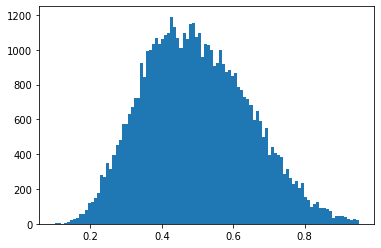

In [18]:
plt.hist(z_posterior, bins = 100)

In [32]:
import time
t1 = time.time()
print(prob(60))
t2 = time.time()
print(t2-t1)

z posterior evaluation time:  150.50117897987366
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1